In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = "..\dados\obitos-2019.csv"
caminho_2020 = "..\dados\obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")


2019 (12382, 6)
2020 (14902, 6)


In [3]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [4]:
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,12
2,AC,OUTRAS,HOSPITAL,< 9,F,47
3,AC,OUTRAS,HOSPITAL,< 9,M,45
4,AC,OUTRAS,OUTRO,< 9,F,4


In [5]:
display(dados_2019['uf'].unique())
display(dados_2020['uf'].unique())
display(len(dados_2019['uf'].unique()))
display(len(dados_2020['uf'].unique()))


array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

27

27

In [6]:
display(dados_2019['tipo_doenca'].unique())
display(dados_2020['tipo_doenca'].unique())

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [7]:
display(dados_2019['tipo_doenca'].value_counts())
display(dados_2020['tipo_doenca'].value_counts())

OUTRAS                        3846
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2063
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

OUTRAS                        3798
INSUFICIENCIA_RESPIRATORIA    2333
PNEUMONIA                     2212
COVID                         2107
SEPTICEMIA                    2027
INDETERMINADA                 1345
SRAG                          1080
Name: tipo_doenca, dtype: int64

In [8]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2019


,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100534
OUTRAS,660249
PNEUMONIA,226238
SEPTICEMIA,175460
SRAG,1498


In [9]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,195262
INDETERMINADA,9689
INSUFICIENCIA_RESPIRATORIA,98749
OUTRAS,688577
PNEUMONIA,181755
SEPTICEMIA,162540
SRAG,16537


In [10]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao 

,total
tipo_doenca,
COVID,195262.000000
INDETERMINADA,1.386520
INSUFICIENCIA_RESPIRATORIA,0.982245
OUTRAS,1.042905
PNEUMONIA,0.803380
SEPTICEMIA,0.926365
SRAG,11.039386


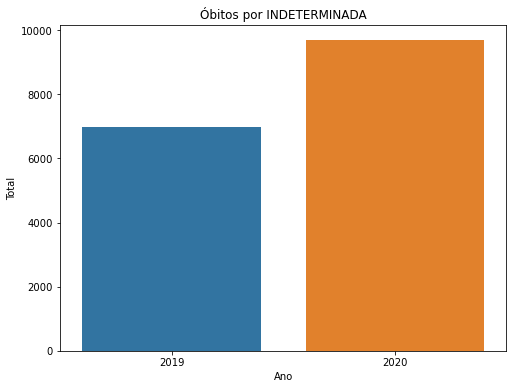

In [26]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()

    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total":lista, "Ano": [2019,2020]})

    plt.figure(figsize=(8,6))    
    sns.barplot(x="Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()



grafico_comparativo('INDETERMINADA')





In [12]:
total_obitos_2020.loc['SRAG']

total    16537
Name: SRAG, dtype: int64